Simulation of arbitrary transfer functions
------------------------------------------

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

We are very familiar with the Euler integration method by now. Let's recap a quick simulation of a first-order system

$$G = \frac{y(s)}{u(s)} = \frac{K}{\tau s + 1}$$

We can rewrite this in the time domain as

$$ y(s) (\tau s + 1) = K u(s) $$

$$ \tau \frac{dy}{dt} + y(t) = K u(t) $$

$$ \frac{dy}{dt} = -\frac{1}{\tau}y(t) + \frac{K}{\tau}u(t)$$

In [2]:
K = 1
tau = 5

In [3]:
def u(t):
    if t<1:
        return 0
    else:
        return 1

In [4]:
ts = numpy.linspace(0, 10, 1000)
dt = ts[1]
y = 0
ys = []
for t in ts:
    dydt = -1/tau*y + 1/tau*u(t)
    
    y += dydt*dt
    ys.append(y)

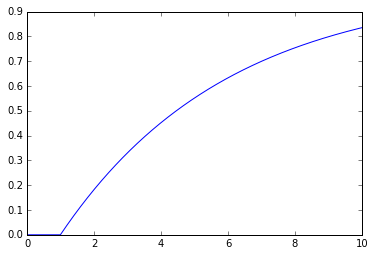

In [5]:
plt.plot(ts, ys)

Notice in the previous code that all the differential equations were linear and that that none of the coefficients of the variables change over time. Such a system is known as a Linear, Time Invariant (LTI) system. The `scipy.signal` module supplies many functions for dealing with LTI systems

In [6]:
import scipy.signal

We define an LTI system by passing the coefficients of the numerator and denominator to the `lti` constructor

In [7]:
G = scipy.signal.ltisys.TransferFunction(K, [tau, 1])

In [8]:
a = int(2)

In [9]:
a.

SyntaxError: invalid syntax (<ipython-input-9-a0d310e2b5e6>, line 1)

In [ ]:
a = 1
type(a)

In [ ]:
a = 'b'
type(a)

In [ ]:
a.

In [ ]:
type(G)

We can obtain the step response of the system by using the `step` method of the object

In [ ]:
_, ys_step = G.step(T=ts)
plt.plot(ts, ys_step);

We can also find the response of the system to an arbitrary input signal by using `scipy.signal.lsim()`

In [ ]:
us = [u(t) for t in ts]  # evaluate the input function at all the times
_, ys_lsim, xs = scipy.signal.lsim(G, U=us, T=ts)
plt.plot(ts, ys_lsim, ts, ys);

We can also use our Euler loop to simulate arbitrary systems using the state space representation

$$\begin{align} \dot{x} &= Ax + Bu \\ y &= Cx + Du \end{align} $$

Luckily the `lti` object we created earlier knows its state space representation.

In [ ]:
x = numpy.matrix(numpy.zeros(G.A.shape[0]))
ys_statespace = []
for t in ts:
    xdot = G.A.dot(x) + G.B.dot(u(t))
    y = G.C.dot(x) +  G.D.dot(u(t))
    
    x += xdot*dt
    ys_statespace.append(y[0,0])

In [ ]:
plt.plot(ts, ys,
         ts, ys_statespace);